# PROBLEM STATEMENT

In this project, using the product reviews of customers about the Amazon Echo, I tried to predict whether the customers are satisfied with the product or not. (Sentiment Analysis) 

# IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# EXPLORE DATASET

In [6]:
# Check if there is any missing values
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

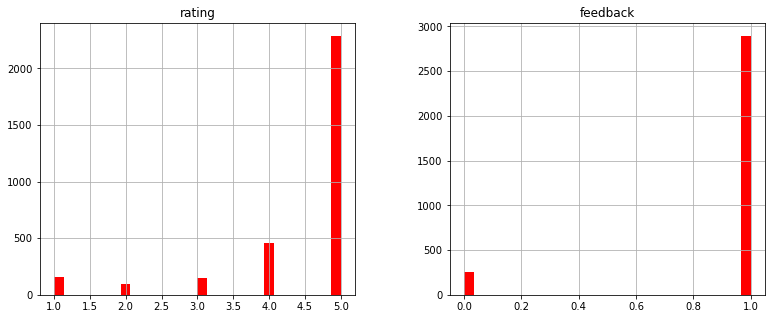

In [7]:
# Plot the histogram of ratings and feedback column
reviews_df.hist(bins = 30, figsize = (13,5), color = 'r')
plt.show()

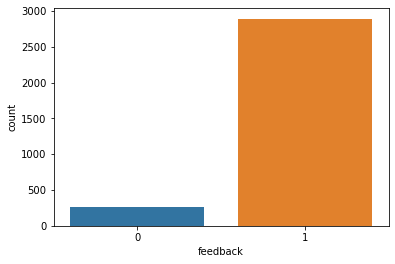

In [8]:
sns.countplot(x='feedback', data=reviews_df, label = "Count") 
plt.show()

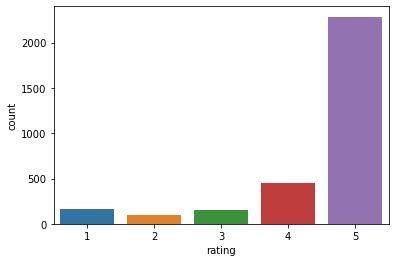

In [9]:
sns.countplot(x='rating', data=reviews_df)
plt.show()

**Observation**:We can see that most of the reviews are positive (we are dealing with imbalanced dataset)

In [10]:
# Let's get the length of each review and put it into new column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


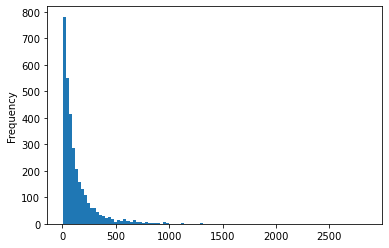

In [11]:
# Let's look at the distribution of new column
reviews_df['length'].plot(bins=100, kind='hist')
plt.show()

In [12]:
# It seems most of the reviews are short in length. Let's look at the longest / mean / shortest reviews:
reviews_df.iloc[reviews_df['length'].argmax()]['verified_reviews']

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [13]:
reviews_df.iloc[reviews_df['length'].argmin()]['verified_reviews']

'😍'

In [14]:
reviews_df.iloc[round(reviews_df['length'].mean())]['verified_reviews']

"It's better than the 1st gen in every way except for one.  I really miss the ring at the top for volume control.  It was quicker and easier to just grab the top and twist without having to look at the buttons and find the &#34;-&#34; one and press it a few times.  I also wish the bass was a bit better.  All in all, it's a great device and I'm happy with it."

In [15]:
# Let's seperate positive and negative reviews
positive = reviews_df[reviews_df['feedback'] == 1]
negative = reviews_df[reviews_df['feedback'] == 0]

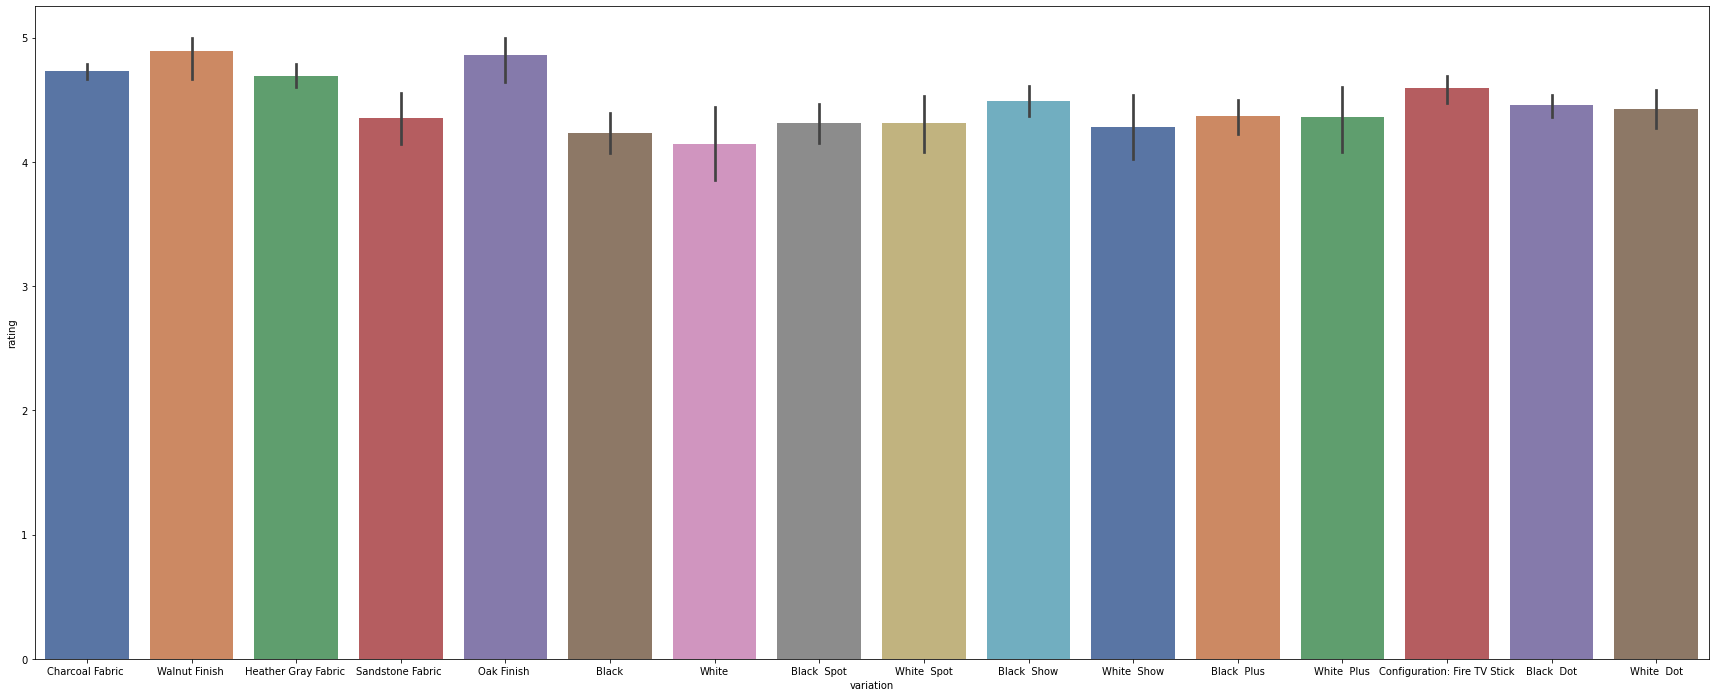

In [16]:
# let's check whether there is a correlation between variation and rating.
plt.figure(figsize = (30,12))
sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep')
plt.show()

In [17]:
# Let's look at what are the most prominent words that customers used
# Convert the comments column into list, then join the sentences into one string
pos_sentences = positive['verified_reviews'].tolist()
neg_sentences = negative['verified_reviews'].tolist()
joined_pos_sentences =" ".join(pos_sentences)
joined_neg_sentences =" ".join(neg_sentences)

In [18]:
from wordcloud import WordCloud

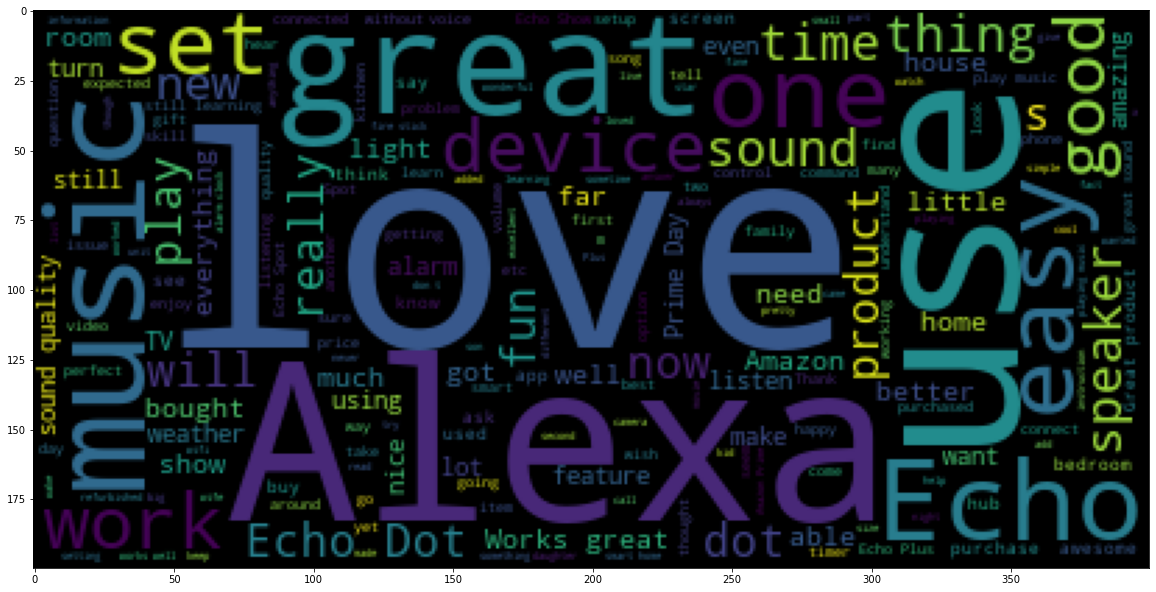

In [19]:
# Most common words in Positive reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(joined_pos_sentences))
plt.show()

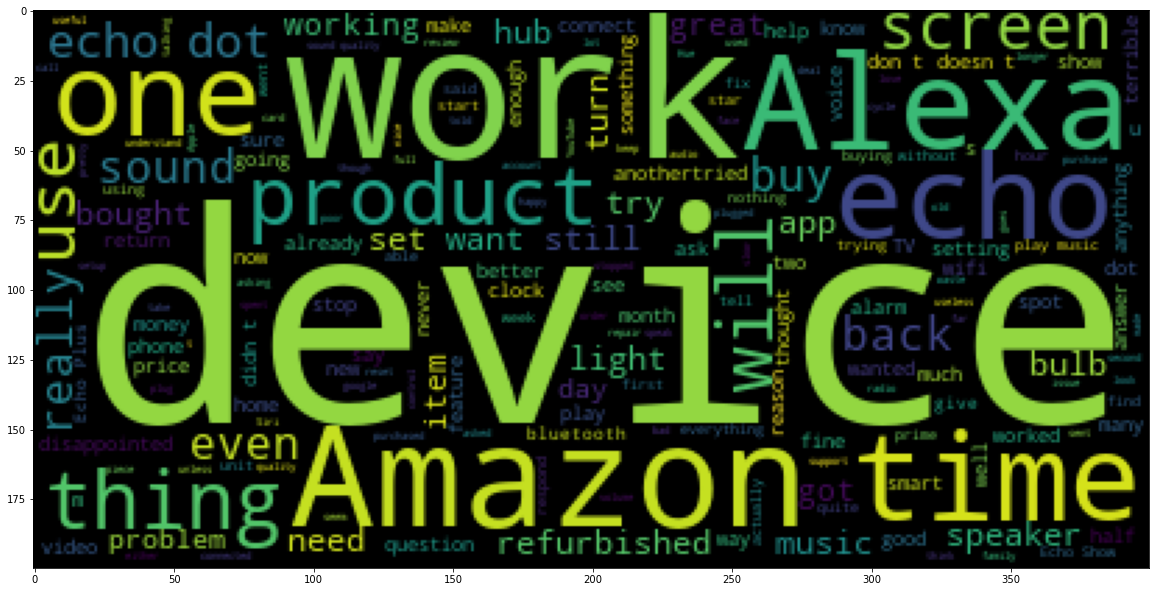

In [20]:
# Most common words in Negative reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(joined_neg_sentences))
plt.show()

# DATA CLEANING

In [21]:
# Let's drop unnecesary columns
reviews_df = reviews_df.drop(['date', 'rating', 'length', 'variation'],axis=1)

In [22]:
reviews_df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


# TEXT PRE-PROCESSING

In [23]:
import re
import string
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [24]:
# Takes a text and returns it's cleaned version
def process_review(text):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tokens = word_tokenize(text.lower()) # tokenize
    clean_text = []
    for word in tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            clean_text.append(stem_word)

    return clean_text

In [25]:
# Builds the positive and negative frequency dictionary of each word
def build_freqs(reviews, labels):
    freqs = {}
    for label, review in zip(labels, reviews):
        for word in process_review(review):
            pair = (word, label)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [26]:
# Takes a single review and return it's frequency
def extract_features(review, label, freqs):
    word_list = process_review(review)
    x = np.zeros((1, 4))
    x[0,0] = 1 #bias term

    for word in word_list:
        x[0,1] += freqs.get((word,1), 0) # increment the word count for the positive label 1
        x[0,2] += freqs.get((word,0), 0) # increment the word count for the negative label 0
    
    x[0,3] = label
    
    return x

In [27]:
# Convert the reviews and corresponding feedbacks into list and pass into the function as argument to obtain frequencies
rev_list = reviews_df['verified_reviews'].tolist()
label_list = reviews_df['feedback'].tolist()
freqs = build_freqs(rev_list, label_list)

In [28]:
# Extract features for each review
features = np.zeros((len(rev_list), 4))
for i in range(len(rev_list)):
    features[i, :]= extract_features(rev_list[i], label_list[i], freqs)

In [29]:
freq_df = pd.DataFrame(features, columns=['bias','pos_freq', 'neg_freq', 'feedback'])
freq_df

,bias,pos_freq,neg_freq,feedback
0,1.0,1816.0,101.0,1.0
1,1.0,1051.0,9.0,1.0
2,1.0,2433.0,281.0,1.0
3,1.0,3237.0,275.0,1.0
4,1.0,505.0,32.0,1.0
...,...,...,...,...
3145,1.0,129.0,3.0,1.0
3146,1.0,1714.0,158.0,1.0
3147,1.0,6302.0,581.0,1.0
3148,1.0,6192.0,744.0,1.0


# MODELING

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [31]:
# Seperate features and target
X = freq_df.drop('feedback', axis=1)
y = freq_df['feedback']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [33]:
# This function plots the Confusion matrix with/without normalization + ROC Curve + Precision-Recall Curve
def model_plots(model, X, y, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(hspace=0.3)
    axes[0,0].set_title('Confusion Matrix')
    plot_confusion_matrix(model, X, y, display_labels=['Negative','Positive'], ax=axes[0,0])
    axes[0,1].set_title('Normalized Confusion Matrix')
    plot_confusion_matrix(model, X, y, normalize='true', display_labels=['Negative','Positive'], ax=axes[0,1])
    axes[1,0].set_title('ROC Curve')
    plot_roc_curve(model, X, y, ax=axes[1,0])
    axes[1,1].set_title('Precision-Recall Curve')
    plot_precision_recall_curve(model, X, y, ax=axes[1,1])
    plt.show()

#### NAIVE_BAYES CLASSIFIER

In [34]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [35]:
# make predictions on test set
y_pred = NB_classifier.predict(X_test)

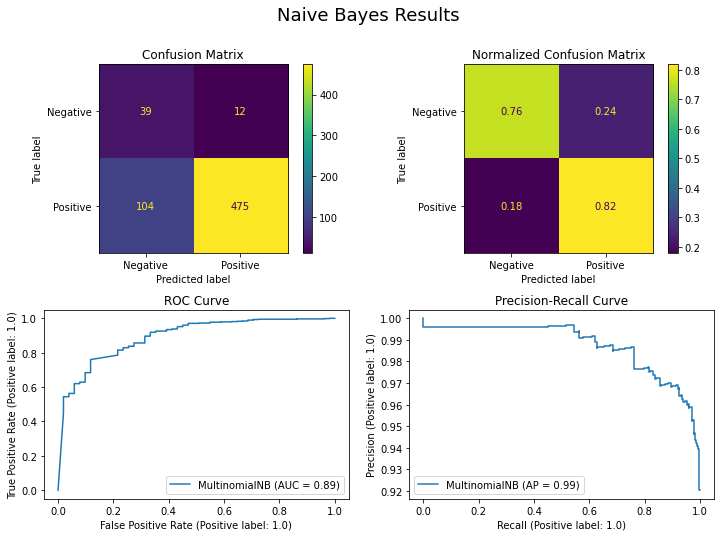

In [36]:
# Show results
model_plots(NB_classifier, X_test, y_test, "Naive Bayes Results")

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.27      0.76      0.40        51
         1.0       0.98      0.82      0.89       579

    accuracy                           0.82       630
   macro avg       0.62      0.79      0.65       630
weighted avg       0.92      0.82      0.85       630



#### LOGISTIC REGRESSION CLASSIFIER

In [38]:
LR_classifier = LogisticRegression(max_iter=1000, class_weight={0:0.8, 1:0.2}, random_state=10)
LR_classifier.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.8, 1: 0.2}, max_iter=1000,
                   random_state=10)

In [39]:
# make predictions on test set
y_pred = LR_classifier.predict(X_test)

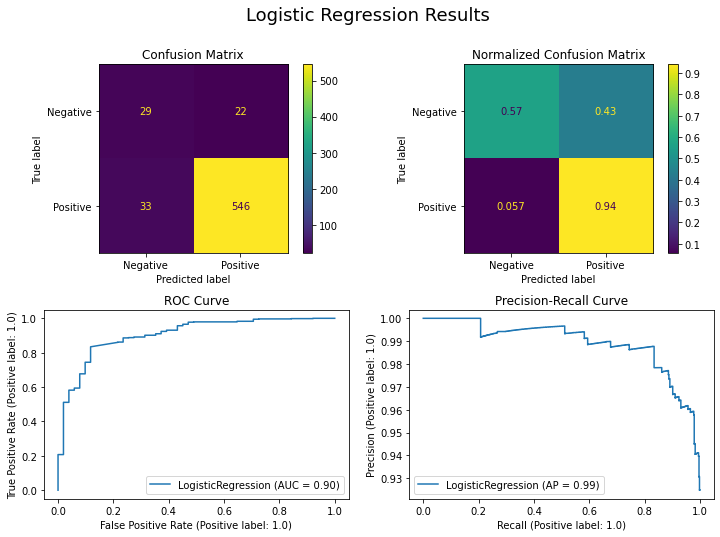

In [40]:
# Show results
model_plots(LR_classifier, X_test, y_test, "Logistic Regression Results")

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.57      0.51        51
         1.0       0.96      0.94      0.95       579

    accuracy                           0.91       630
   macro avg       0.71      0.76      0.73       630
weighted avg       0.92      0.91      0.92       630

